In [99]:
import numpy as np
import matplotlib.pyplot as plt

In [100]:
def step_function(x):
    return np.array(x > 0, dtype = int)

In [101]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [102]:
def relu(x):
    return np.maximum(0, x)

In [103]:
def show_activation_function(func):
    x = np.arange(-10, 10, 0.01)
    y = func(x)
    plt.plot(x, y)
    plt.show()

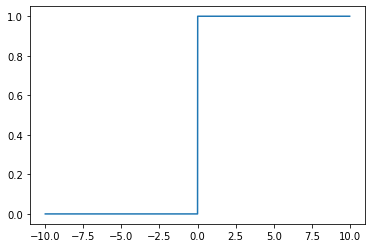

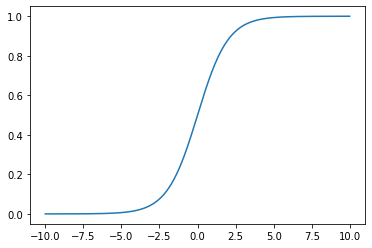

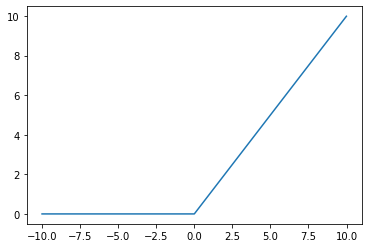

In [104]:
show_activation_function(step_function)
show_activation_function(sigmoid)
show_activation_function(relu)

In [105]:
def identity_function(x):
    return x

In [106]:
import numpy.random as random

class simple_3layer_NN:
    def __init__(self, x_len, h1_len, h2_len, output_len, initialize_num, activation_function_ = sigmoid):
        self.activation_function = activation_function_
        self.params = {}
        self.params["W1"] = random.random((x_len, h1_len)) / initialize_num
        self.params["b1"] = random.random(h1_len) / initialize_num
        self.params["W2"] = random.random((h1_len, h2_len)) / initialize_num
        self.params["b2"] = random.random(h2_len) / initialize_num
        self.params["W3"] = random.random((h2_len, output_len)) / initialize_num #random.ramdom.() 안의크기만큼랜덤한수
        self.params["b3"] = random.random(output_len) / initialize_num #가중치초기화
        
    def forward(self, x):
        a1 = x @ self.params["W1"] + self.params["b1"]
        z1 = self.activation_function(a1)
        a2 = z1 @ self.params["W2"] + self.params["b2"]
        z2 = self.activation_function(a2)
        a3 = z2 @ self.params["W3"] + self.params["b3"]
        z3 = self.activation_function(a3)
        return identity_function(z3)
        
        

In [107]:
from timeit import default_timer as timer
from datetime import timedelta

def time_NN():
    activation_function_list = [step_function, "step_function", sigmoid, "sigmoid", relu, "relu"] 
    x = random.random((30000, 1000))
    for i in range(3):
        activation_function = activation_function_list[i*2]
        activation_function_name = activation_function_list[i*2 + 1]        
        start = timer()
        Network_model = simple_3layer_NN(1000, 1500, 2000, 100, 100.0, activation_function)
        y = Network_model.forward(x)
        end = timer()
        plt.scatter(np.arange(100), y[0,:])
        plt.show()
        print(activation_function_name + " took " + str(timedelta(seconds=end-start)))

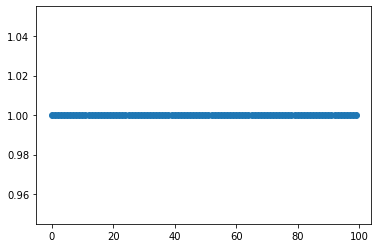

step_function took 0:00:02.220350


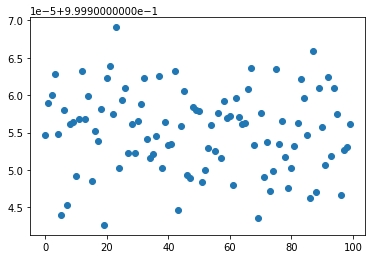

sigmoid took 0:00:02.787418


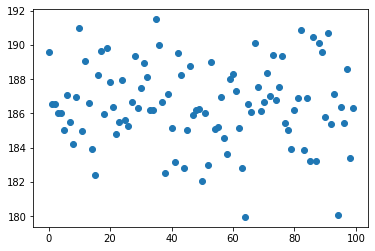

relu took 0:00:02.137559


In [108]:
time_NN()